<a href="https://colab.research.google.com/github/AmandaGamage/data_classification_methods/blob/main/Stat_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_txt_file='train.txt'
test_txt_file='test.txt'
train_data_csv='train_data.csv'
test_data_csv = 'test_data.csv'

In [ ]:
class CleanData:
  def clean_txt_file(txt_file_name):
    # Define delimiter used in text file
    delimiter = ' '

    # Open text file with specified delimiter
    with open(txt_file_name, 'r') as f:
      reader = csv.reader(f, delimiter=delimiter)
    # Open text file for reading
    with open(txt_file_name, 'r') as infile:
      reader = csv.reader(infile, delimiter=' ')

  def convert_to_csv(file_name,csv_name):
    CleanData.clean_txt_file(file_name)
    dataframe1 = pd.read_csv(file_name, sep='\s+', header=None)
    dataframe1.to_csv(csv_name, index = False)

  def add_headers(csv_name):
    headerList = ['x1', 'x2', 'y']
    df = pd.read_csv(csv_name)
    df.to_csv(csv_name, header=headerList, index=False)

  def convert_binary_to_int(df,column_header):
    df[column_header] = df[column_header].astype(int)
    return df

  def get_data(csv_name):
    points = pd.read_csv(csv_name)
    points=CleanData.convert_binary_to_int(points,'y')

    x = points['x1'].values
    y = points['x2'].values

    temp = points['y']
    z = temp.values
    return x,y,z

  #combine the two input arrays
  def combine_arrays(csv_name):
    x,y,z=CleanData.get_data(csv_name)
    X = np.vstack((x, y)).T
    return X,z

In [ ]:
CleanData.convert_to_csv(train_txt_file, train_data_csv)
CleanData.add_headers(train_data_csv)
CleanData.convert_to_csv(test_txt_file,test_data_csv)
CleanData.add_headers(test_data_csv)

In [ ]:
class DrawPlots:
  def get_data_to_plot(csv_name):
    fig = plt.figure()
    x,y,z=CleanData.get_data(csv_name)
    return x,y,z


  def draw_scatter_plots_with_color_coding(csv_name,graph_name):
    x,y,z=DrawPlots.get_data_to_plot(csv_name)

    # Create scatter plot with color-coding
    plt.title(graph_name)
    plt.scatter(x, y, c=z, cmap='coolwarm')
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.colorbar(label='y')
    plt.show()

  def draw_scatter_plot(csv_name,graph_name):
    x,y,z=DrawPlots.get_data_to_plot(csv_name)
    fig = plt.figure()
    plt.title(graph_name)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='r', marker='o')
    plt.show()


  def draw_box_plot(csv_name,graph_name):
    # Generate hypothetical data
    x,y,z=DrawPlots.get_data_to_plot(csv_name)
  # Create box plots for each binary category
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.boxplot([x[z == 0], x[z == 1]])
    plt.xticks([1, 2], ['Binary 0', 'Binary 1'])
    plt.ylabel('x1')
    plt.title('Box Plot of x1')

    plt.subplot(2, 1, 2)
    plt.boxplot([y[z == 0], y[z == 1]])
    plt.xticks([1, 2], ['Binary 0', 'Binary 1'])
    plt.ylabel('Float Variable 2')
    plt.title('Box Plot of Float Variable 2')

    plt.title(graph_name)

    plt.tight_layout()
    plt.show()

  def plot_data_scatter_color(csv_name,graph_name):
    DrawPlots.draw_scatter_plots_with_color_coding(csv_name,graph_name)

  def plot_data_scatter(csv_name,graph_name):
    DrawPlots.draw_scatter_plot(csv_name,graph_name)

  def plot_box(csv_name,graph_name):
    DrawPlots.draw_box_plot(csv_name,graph_name)


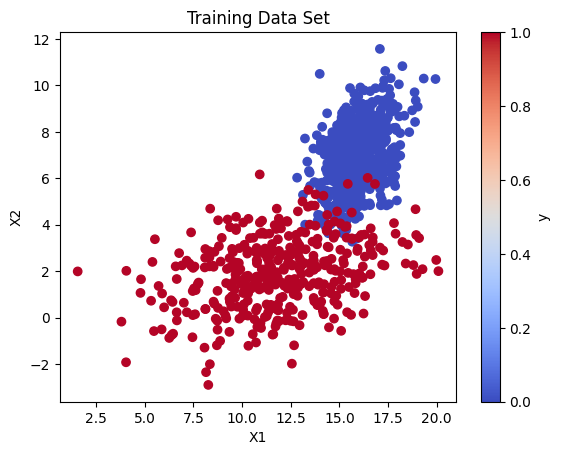

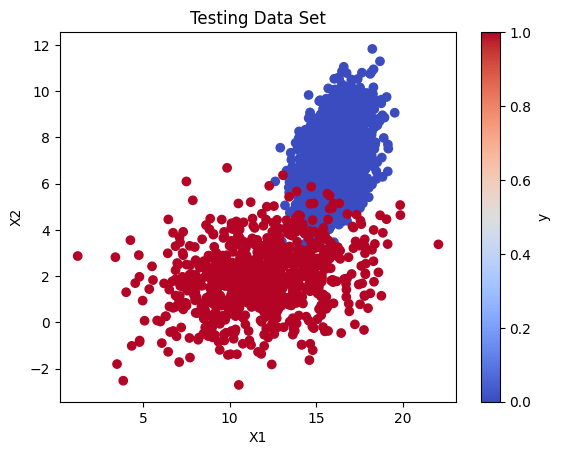

In [ ]:
DrawPlots.plot_data_scatter_color(train_data_csv,"Training Data Set")
DrawPlots.plot_data_scatter_color(test_data_csv, "Testing Data Set")

In [ ]:
#not used
class NaiveBayesClassification:
  def fit(X, y):
    classes = np.unique(y)
    mean = {}
    var = {}
    priors = {}

    for c in classes:
      X_c = X[y == c]
      mean[c] = X_c.mean(axis=0)
      var[c] = X_c.var(axis=0)
      priors[c] = len(X_c) / len(X)

    return mean, var, priors

  def calculate_likelihood(x, mean, var):
      exp = np.exp(-(x - mean) ** 2 / (2 * var))
      return (1 / (np.sqrt(2 * np.pi * var))) * exp


  def predict(x, mean, var, priors):
      classes = mean.keys()
      posteriors = []

      for c in classes:
          prior = np.log(priors[c])
          likelihood = np.sum(np.log(NaiveBayesClassification.calculate_likelihood(x, mean[c], var[c])))
          posterior = prior + likelihood
          posteriors.append(posterior)

      pred_arr = list(classes)[np.argmax(posteriors)]

      y_pred = [pred_arr for i in x]
      return np.array(y_pred)

In [ ]:
class ClassificationError:
  def get_classsification_error(y,y_pred):
    if len(y)!=len(y_pred):
      raise ValueError ("Different lengths. Please check the input arrays again")
    else:
      tot_length=len(y_pred)
      incorrect_pred=0
      for real_val, pred_val in zip(y, y_pred):
        if real_val != pred_val:
            incorrect_pred += 1
      classification_error = incorrect_pred/ tot_length
      return classification_error

In [ ]:
def train_gaussian(csv_name):
  # Train the Gaussian Naive Bayes classifier
  X,y=CleanData.combine_arrays(csv_name)
  mean, var, priors = NaiveBayesClassification.fit(X, y)
  return mean,var,priors

tr_mean,tr_var,tr_priors=train_gaussian(train_data_csv)

In [ ]:
def data_classification_naive_beyes(mean, var, priors,x,y):
  X_features = x[:, :2]  # Extract the features from the test set
  print("2:"+ str(len(y)))
  nb_predictions = NaiveBayesClassification.predict(X_features, mean, var, priors)
  return nb_predictions

def calculate_error_rate(y,y_pred,data_type,classification_type):
  error_rate=ClassificationError.get_classsification_error(y,y_pred)
  print(f"Classification Error Rate {error_rate:.2f} for "+data_type+" Data from "+classification_type)

In [ ]:
gnb_classifier = GaussianNB()

# Fit the classifier to the training data
X_test,y_test=CleanData.combine_arrays(test_data_csv)
X_train,y_train=CleanData.combine_arrays(train_data_csv)
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = gnb_classifier.predict(X_test)

# Calculate and print the accuracy
calculate_error_rate(y_test,y_pred_test,"test","Naive Bayes Classification")

Classification Error Rate 0.02 for test Data from Naive Bayes Classification


In [ ]:
gnb_classifier = GaussianNB()

# Fit the classifier to the training data
gnb_classifier.fit(X_train, y_train)

# Make predictions on the train data
y_pred_train = gnb_classifier.predict(X_train)

# Calculate and print the accuracy
calculate_error_rate(y_train,y_pred_train,"train","Naive Bayes Classification")


Classification Error Rate 0.03 for train Data from Naive Bayes Classification


In [ ]:
X_train,y_train=CleanData.combine_arrays(train_data_csv)
X_test,y_test=CleanData.combine_arrays(test_data_csv)

In [ ]:
class LinearRegression:
  def __init__(self):
        self.coefficients = None

  def get_linear_regression(X_train, y_train, X_test, y_test, threshold=0.5):

      X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
      X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

      coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

      y_train_pred = LinearRegression.predict(X_train, coefficients, threshold)
      #train_accuracy = calculate_accuracy(y_train, y_train_pred)

      y_test_pred = LinearRegression.predict(X_test, coefficients, threshold)
      #test_accuracy = calculate_accuracy(y_test, y_test_pred)

      return y_train_pred, y_test_pred,coefficients,threshold

  def predict(X, coefficients, threshold):
      predicted_values = X.dot(coefficients)
      predicted_labels = (predicted_values >= threshold).astype(int)
      return predicted_labels

  def plot_decision_boundary(X, y, coefficients,data_file, threshold=0.5):
    x1 = X[:, 0]
    x2 = X[:, 1]

    x1_min, x1_max = min(x1), max(x1)
    x2_min, x2_max = min(x2), max(x2)

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    Z = np.dot(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()], coefficients)
    Z = Z.reshape(xx1.shape)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')

    plt.contourf(xx1, xx2, Z, levels=[-1, threshold, 2], cmap=plt.cm.RdBu, alpha=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(data_file)
    plt.show()


Classification Error Rate 0.04 for train Data from Linear Regression
Classification Error Rate 0.03 for test Data from Linear Regression


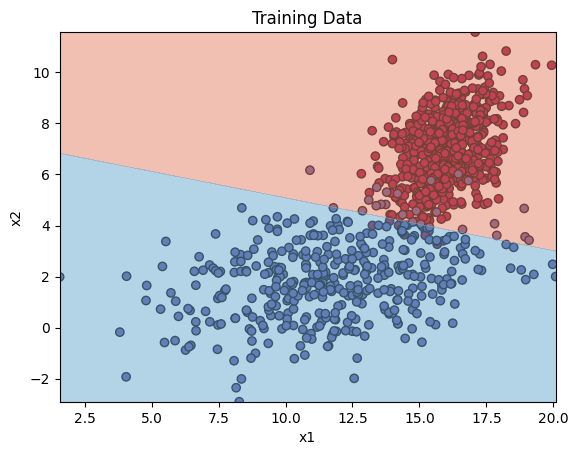

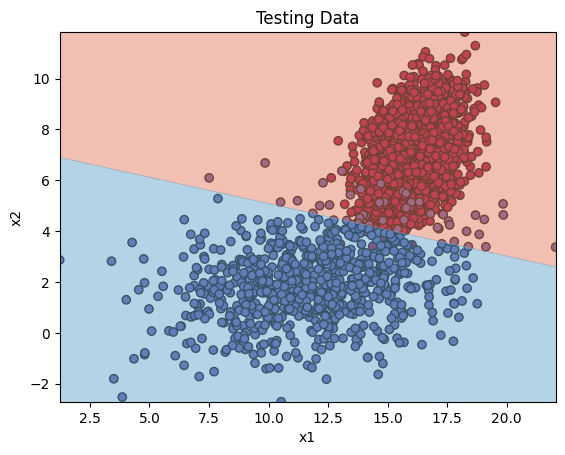

In [ ]:
X_train,y_train=CleanData.combine_arrays(train_data_csv)
X_test,y_test=CleanData.combine_arrays(test_data_csv)
y_train_pred, y_test_pred,coefficients,threshold=LinearRegression.get_linear_regression(X_train,y_train,X_test,y_test)
train_accuracy = calculate_error_rate(y_train, y_train_pred,"train","Linear Regression")
test_accuracy = calculate_error_rate(y_test, y_test_pred,"test","Linear Regression")
LinearRegression.plot_decision_boundary(X_train, y_train, coefficients,"Training Data", threshold)
LinearRegression.plot_decision_boundary(X_test, y_test, coefficients,"Testing Data", threshold)


In [ ]:
class KNNClassifier:
  def knn_class_prediction(k,X_train,y_train,X_test):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(X_train, y_train)

    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)
    return y_train_pred,y_test_pred


    k  Train Accuracy  Test Accuracy
0   1           1.000       0.968214
1   5           0.975       0.979643
2  10           0.973       0.980000
3  15           0.976       0.980357
4  20           0.975       0.981071


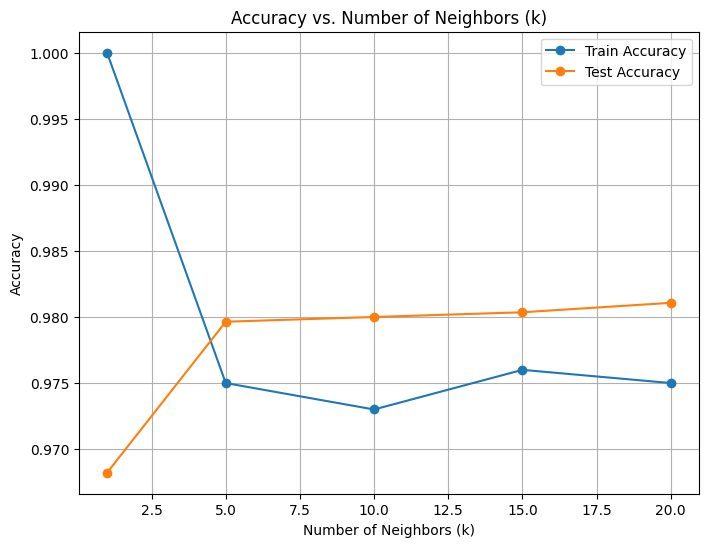

In [ ]:
train_accuracies = []
test_accuracies = []
k=[1,5,10,15,20]
for k_i in k:
  y_train_pred,y_test_pred =KNNClassifier.knn_class_prediction(k_i,X_train,y_train,X_test)
  #test_accuracy = calculate_error_rate(y_test, y_test_pred,"test","k-NN Classifier")
  #accuracy = accuracy_score(y_test, y_pred)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  #print(str(k_i)+":" +str(accuracy))

accuracy_table = pd.DataFrame({'k': k, 'Train Accuracy': train_accuracies, 'Test Accuracy': test_accuracies})
print(accuracy_table)

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(k, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid()
plt.show()